In [1]:
import pandas as pd
import scimap as sm
import anndata as ad
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import json
from matplotlib.colors import ListedColormap
from scipy.stats import mannwhitneyu
warnings.filterwarnings("ignore")

Running SCIMAP  2.3.1


/Users/lukashat/miniforge3/envs/scimap/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [ ]:
extension = 'png'
save_path = f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/paper/plots/figures/figure_3/{extension}/'
save_path_supp = f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/paper/plots/figures/suppl_figure_3/{extension}/'
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
adata = ad.read_h5ad("/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/results/standard/adatas/cells_final.h5ad")
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/neighborhood_color_map.json', 'r') as f:
    neighborhood_color_map = json.load(f)
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/phenotype_color_map.json', 'r') as f:
    phenotype_color_map = json.load(f)
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/disease_color_map.json', 'r') as f:
    disease_color_map = json.load(f)
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/disease3_color_map.json', 'r') as f:
    disease3_color_map = json.load(f)
neighborhood_colors = [neighborhood_color_map[cat] for cat in list(adata.obs['cellcharter_CN'].cat.categories)]
neighborhood_colors = ListedColormap(neighborhood_colors)
phenotype_colors = [phenotype_color_map[cat] for cat in list(adata.obs['Phenotype4'].cat.categories)]
phenotype_colors = ListedColormap(phenotype_colors)
disease_colors = [disease_color_map[cat] for cat in list(adata.obs['disease2'].cat.categories)]
disease_colors = ListedColormap(disease_colors)
disease3_colors = [disease3_color_map[cat] for cat in list(adata.obs['disease3'].cat.categories)]
disease3_colors = ListedColormap(disease3_colors)

In [3]:
adata.obs['disease2'] = adata.obs['disease2'].astype(str)
adata = adata[adata.obs['disease2'].isin(['MM_BD', 'MM_noBD'])]
adata.obs['disease2'] = adata.obs['disease2'].astype('category')

In [4]:
radius = 20
sm.tl.spatial_count(adata, x_coordinate='X_centroid', y_coordinate='Y_centroid', phenotype='Phenotype4', method='radius', radius=radius, imageid='image_ID', verbose=True, label='spatial_count') 

Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours within 20 pixels of every cell
Identifying neighbours withi

AnnData object with n_obs × n_vars = 875395 × 33
    obs: 'Object', 'area', 'Y_centroid', 'X_centroid', 'axis_major_length', 'axis_minor_length', 'eccentricity', 'distance_to_bone', 'image_ID', 'disease', 'patient_ID', 'ROI', 'disease2', 'distance_to_bone_corrected', 'cellcharter_CN', 'Phenotype4', 'HistoneH3', 'disease3'
    var: 'name', 'channel', 'deepcell', 'mean', 'std'
    uns: 'Phenotype4_colors', 'cellcharter_CN_colors', 'spatial', 'spatial_neighbors', 'spatial_count'
    obsm: 'spatial'
    layers: 'arcsinh', 'zscore'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [5]:
disease_mapping = adata.obs[['disease2', 'image_ID']].drop_duplicates()
disease_mapping.set_index('image_ID', inplace=True)


In [6]:
df = adata.uns['spatial_count']
df['Phenotype4'] = adata.obs['Phenotype4']
df['image_ID'] = adata.obs['image_ID']
df['image_ID'] = df['image_ID'].astype(str)
df = df[df['Phenotype4'] == 'Osteoclasts']
df = df.drop(columns=['Phenotype4'])[['PCs', 'image_ID']]
df = df.groupby('image_ID').median()
df.reset_index(inplace=True)
df['disease2'] = df['image_ID'].map(disease_mapping['disease2'])
df

neighbour_phenotype,image_ID,PCs,disease2
0,TS-373_IMC07_UB_001.csv,0.000000,MM_noBD
1,TS-373_IMC07_UB_002.csv,0.200000,MM_noBD
2,TS-373_IMC08_UB_001.csv,0.000000,MM_BD
3,TS-373_IMC08_UB_002.csv,0.250000,MM_BD
4,TS-373_IMC12_UB_001.csv,0.125000,MM_noBD
...,...,...,...
81,TS-373_IMC90.1_B_001.csv,0.666667,MM_BD
82,TS-373_IMC90.1_B_002.csv,0.125000,MM_BD
83,TS-373_IMC93_B_001.csv,0.136364,MM_BD
84,TS-373_IMC93_B_002.csv,0.000000,MM_BD


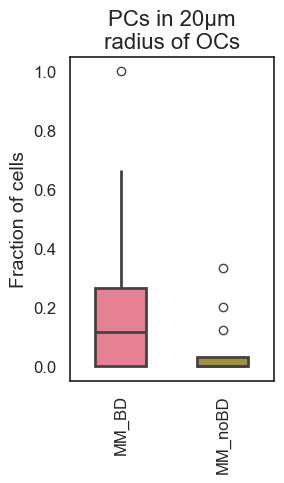

In [7]:
fig, ax = plt.subplots(figsize=(3, 5))
sns.boxplot(data=df, x='disease2', y='PCs', palette=disease_color_map, ax=ax, showcaps=False, linewidth=2, width=0.5)
plt.xticks(rotation=90)
plt.title(f'PCs in {radius}µm\nradius of OCs', fontsize=16)
plt.ylabel('Fraction of cells', fontsize=14)
plt.xlabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(save_path, f'OC_neighborhood_PCs.{extension}'), bbox_inches='tight')


In [8]:
mm_bd = df[df['disease2'] == 'MM_BD']['PCs']
mm_nobd = df[df['disease2'] == 'MM_noBD']['PCs']
stat, p = mannwhitneyu(mm_bd, mm_nobd)
print(f"MM_BD vs MM_noBD: {p}")


MM_BD vs MM_noBD: 0.03602215922979787


In [9]:
df = adata.uns['spatial_count']
df['Phenotype4'] = adata.obs['Phenotype4']
df['image_ID'] = adata.obs['image_ID']
df['image_ID'] = df['image_ID'].astype(str)
df = df[df['Phenotype4'] == 'OB/RUNX2+']
df = df.drop(columns=['Phenotype4'])[['PCs', 'image_ID']]
df = df.groupby('image_ID').median()
df.reset_index(inplace=True)
df['disease2'] = df['image_ID'].map(disease_mapping['disease2'])
df

neighbour_phenotype,image_ID,PCs,disease2
0,TS-373_IMC01_UB_001.csv,0.142857,MM_noBD
1,TS-373_IMC01_UB_002.csv,0.200000,MM_noBD
2,TS-373_IMC07_UB_001.csv,0.166667,MM_noBD
3,TS-373_IMC07_UB_002.csv,0.531250,MM_noBD
4,TS-373_IMC08_UB_001.csv,0.166667,MM_BD
...,...,...,...
125,TS-373_IMC93_B_002.csv,0.250000,MM_BD
126,TS-373_IMC95_B_001.csv,0.066667,MM_BD
127,TS-373_IMC95_B_002.csv,0.000000,MM_BD
128,TS-373_IMC96_B_001.csv,0.000000,MM_BD


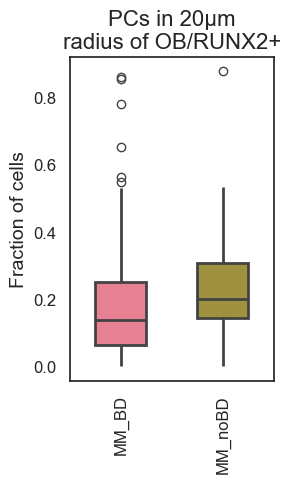

In [10]:
fig, ax = plt.subplots(figsize=(3, 5))
sns.boxplot(data=df, x='disease2', y='PCs', palette=disease_color_map, ax=ax, showcaps=False, linewidth=2, width=0.5)
plt.xticks(rotation=90)
plt.title(f'PCs in {radius}µm\nradius of OB/RUNX2+', fontsize=16)
plt.ylabel('Fraction of cells', fontsize=14)
plt.xlabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(save_path_supp, f'OBs_neighborhood_PCs.{extension}'), bbox_inches='tight')


In [11]:
mm_bd = df[df['disease2'] == 'MM_BD']['PCs']
mm_nobd = df[df['disease2'] == 'MM_noBD']['PCs']
stat, p = mannwhitneyu(mm_bd, mm_nobd)
print(f"MM_BD vs MM_noBD: {p}")

MM_BD vs MM_noBD: 0.0915151018759239
